In [5]:
import pandas as pd
from os import listdir
from datetime import datetime


def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)


def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

def set_dates(df):
    df["datetime"] = [read_date(date) for date in df.timestamp]
    df["date"] = [d.date() for d in df["datetime"]]

# def change_scale(df,n,param):
#     """plot the parameter data sum on a given time 
#     ex : n=48 gives the sum for each day"""
#     df[param+"_sum"] = df[param].rolling(n).sum()
#     return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

def change_scale(df):
    """return the aggregation by day"""
    df_by_date = df.groupby("date").agg("sum").reset_index()
    return df_by_date

file_list = listdir("consumption_power")
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list] #remove the first last caracters to keep the group n0

In [14]:
#read data
n0 = 4
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)

In [15]:
print(consumption_df.columns)
print(meteo_df.columns)

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw', 'datetime', 'date'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'date'],
      dtype='object')


In [16]:
print(meteo_df.sort_values(by ="timestamp").head())
#point each hour

       prate  tcdcclm            timestamp       tmp2m  wnd10m_u  wnd10m_v  \
34338    0.0     66.0  2016-04-01 00:00:00  275.871000     -0.70      4.05   
34278    0.0     68.0  2016-04-01 01:00:00  276.874000     -0.49      5.27   
34035    0.0     79.0  2016-04-01 02:00:00  277.334016     -0.86      5.39   
34282    0.0     84.0  2016-04-01 03:00:00  277.581000     -0.51      5.38   
34300    0.0     88.0  2016-04-01 04:00:00  277.933016     -0.08      5.81   

       group_id            datetime        date  
34338     82024 2016-04-01 00:00:00  2016-04-01  
34278     82024 2016-04-01 01:00:00  2016-04-01  
34035     82024 2016-04-01 02:00:00  2016-04-01  
34282     82024 2016-04-01 03:00:00  2016-04-01  
34300     82024 2016-04-01 04:00:00  2016-04-01  


In [17]:
print(consumption_df.sort_values(by ="timestamp").head())
#point each 1/2 hour

   filter_mva  filter_mw  filtered_manual_int  gen  net_mw  time_zone_offset  \
0         0.0        0.0                  1.0    0  22.651                 1   
1         0.0        0.0                  1.0    0  21.023                 1   
2         0.0        0.0                  1.0    0  19.646                 1   
3         0.0        0.0                  1.0    0  19.126                 1   
4         0.0        0.0                  1.0    0  19.058                 1   

             timestamp  underlying_mw            datetime        date  
0  2016-04-01 00:30:00         22.651 2016-04-01 00:30:00  2016-04-01  
1  2016-04-01 01:00:00         21.023 2016-04-01 01:00:00  2016-04-01  
2  2016-04-01 01:30:00         19.646 2016-04-01 01:30:00  2016-04-01  
3  2016-04-01 02:00:00         19.126 2016-04-01 02:00:00  2016-04-01  
4  2016-04-01 02:30:00         19.058 2016-04-01 02:30:00  2016-04-01  


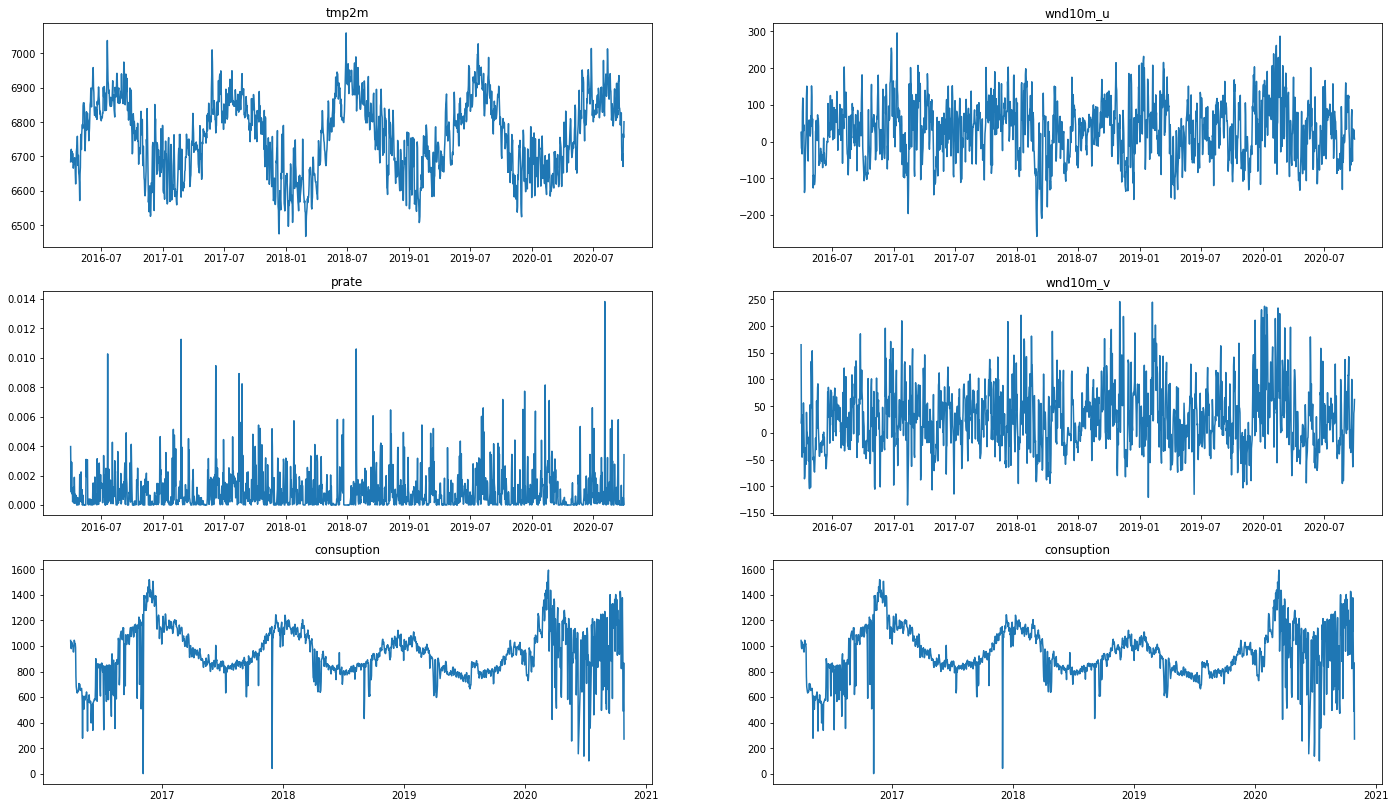

In [33]:
import matplotlib.pyplot as plt
def visu(meteo_df,consumption_df):
    df_meteo_by_day = change_scale(meteo_df)
    df_consumption_by_day = change_scale(consumption_df)
    fig, axs = plt.subplots(3, 2,figsize=(24,14))
    axs[0, 0].plot(df_meteo_by_day.date,df_meteo_by_day.tmp2m)
    axs[0, 0].set_title('tmp2m')
    axs[0, 1].plot(df_meteo_by_day.date,df_meteo_by_day.wnd10m_u)
    axs[0, 1].set_title('wnd10m_u')
    axs[1, 1].plot(df_meteo_by_day.date,df_meteo_by_day.wnd10m_v)
    axs[1, 1].set_title('wnd10m_v')
    axs[1, 0].plot(df_meteo_by_day.date,df_meteo_by_day.prate)
    axs[1, 0].set_title('prate')
    axs[2, 0].plot(df_consumption_by_day.date,df_consumption_by_day.underlying_mw)
    axs[2, 0].set_title('consuption')
    axs[2, 1].plot(df_consumption_by_day.date,df_consumption_by_day.underlying_mw)
    axs[2, 1].set_title('consuption')
    fig.
    # fig = plt.figure(figsize=(11,7))
    
visu(meteo_df,consumption_df)

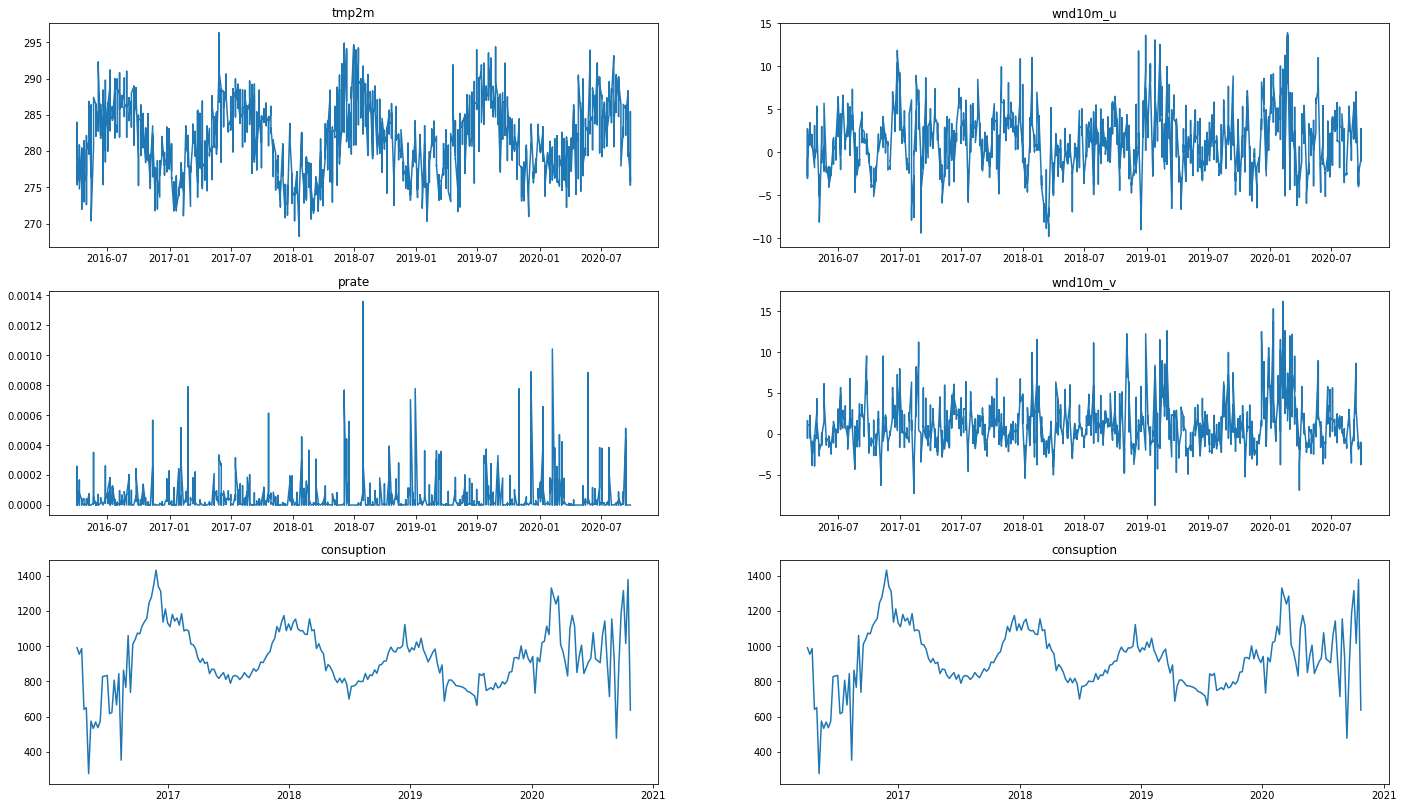

In [66]:
def filter_day(df):
    return df[[d.weekday() == 5 for d in df.date]] #all the saturday

def visu(meteo_df,consumption_df):
    fig, axs = plt.subplots(3, 2,figsize=(24,14))
    axs[0, 0].plot(meteo_df.date,meteo_df.tmp2m)
    axs[0, 0].set_title('tmp2m')
    axs[0, 1].plot(meteo_df.date,meteo_df.wnd10m_u)
    axs[0, 1].set_title('wnd10m_u')
    axs[1, 1].plot(meteo_df.date,meteo_df.wnd10m_v)
    axs[1, 1].set_title('wnd10m_v')
    axs[1, 0].plot(meteo_df.date,meteo_df.prate)
    axs[1, 0].set_title('prate')
    axs[2, 0].plot(consumption_df.date,consumption_df.underlying_mw)
    axs[2, 0].set_title('consuption')
    axs[2, 1].plot(consumption_df.date,consumption_df.underlying_mw)
    axs[2, 1].set_title('consuption')
    # fig = plt.figure(figsize=(11,7))

def plot_saturdays(meteo_df,consumption_df):
    df_meteo_by_day = change_scale(meteo_df)
    df_consumption_by_day = change_scale(consumption_df)
    df_meteo_by_day = filter_day(meteo_df)
    df_consumption_by_day = filter_day(df_consumption_by_day)
    
    df_meteo_by_day = df_meteo_by_day.sort_values("date").reset_index()
    df_consumption_by_day = df_consumption_by_day.sort_values("date").reset_index()

    visu(df_meteo_by_day,df_consumption_by_day)

plot_saturdays(meteo_df,consumption_df)

In [70]:
meteo_df.date[0]

datetime.date(2019, 9, 3)

In [77]:
consumption_df


,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,timestamp,underlying_mw,datetime,date
0,0.0,0.0,1.0,0,19.087,1,2016-04-01 00:30:00,19.087,2016-04-01 00:30:00,2016-04-01
1,0.0,0.0,1.0,0,18.056,1,2016-04-01 01:00:00,18.056,2016-04-01 01:00:00,2016-04-01
2,0.0,0.0,1.0,0,16.439,1,2016-04-01 01:30:00,16.439,2016-04-01 01:30:00,2016-04-01
3,0.0,0.0,1.0,0,15.629,1,2016-04-01 02:00:00,15.629,2016-04-01 02:00:00,2016-04-01
4,0.0,0.0,1.0,0,15.420,1,2016-04-01 02:30:00,15.420,2016-04-01 02:30:00,2016-04-01
...,...,...,...,...,...,...,...,...,...,...
79677,NaN,NaN,NaN,0,14.426,0,2020-10-27 06:00:00,14.426,2020-10-27 06:00:00,2020-10-27
79678,NaN,NaN,NaN,0,16.593,0,2020-10-27 06:30:00,16.593,2020-10-27 06:30:00,2020-10-27
79679,NaN,NaN,NaN,0,19.341,0,2020-10-27 07:00:00,19.341,2020-10-27 07:00:00,2020-10-27
79680,NaN,NaN,NaN,0,22.862,0,2020-10-27 07:30:00,22.862,2020-10-27 07:30:00,2020-10-27


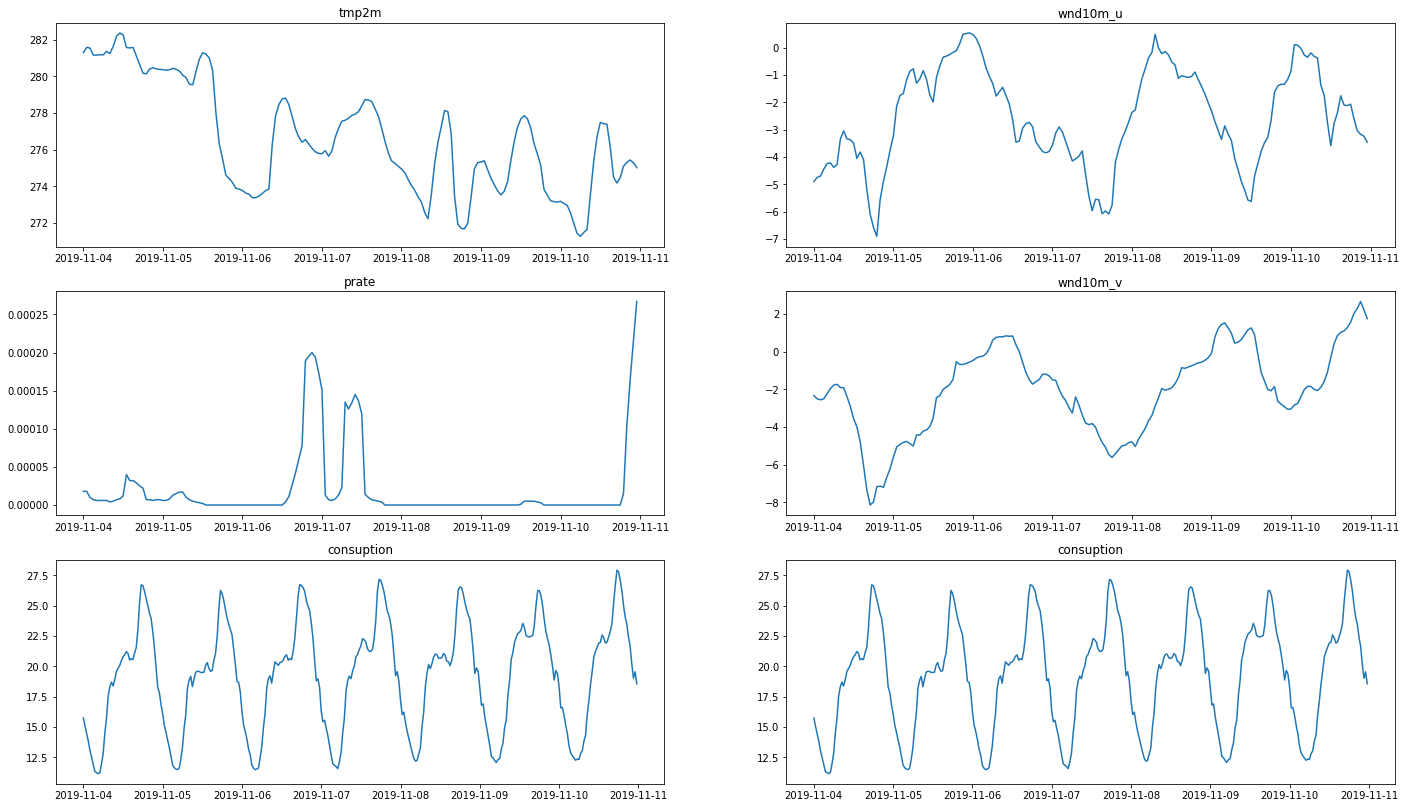

In [84]:
def filter_week(df):
    return df[[d>=date(2019,11,4) and d<=date(2019,11,10)  for d in df.date]] #all the saturday

def visu(meteo_df,consumption_df):
    fig, axs = plt.subplots(3, 2,figsize=(24,14))

    axs[0, 0].plot(meteo_df.datetime,meteo_df.tmp2m)
    axs[0, 0].set_title('tmp2m')
    axs[0, 1].plot(meteo_df.datetime,meteo_df.wnd10m_u)
    axs[0, 1].set_title('wnd10m_u')
    axs[1, 1].plot(meteo_df.datetime,meteo_df.wnd10m_v)
    axs[1, 1].set_title('wnd10m_v')
    axs[1, 0].plot(meteo_df.datetime,meteo_df.prate)
    axs[1, 0].set_title('prate')
    axs[2, 0].plot(consumption_df.datetime,consumption_df.underlying_mw)
    axs[2, 0].set_title('consuption')
    axs[2, 1].plot(consumption_df.datetime,consumption_df.underlying_mw)
    axs[2, 1].set_title('consuption')
    # fig = plt.figure(figsize=(11,7))

def plot_week(meteo_df,consumption_df):
    # df_meteo_by_day = change_scale(meteo_df)
    # df_consumption_by_day = change_scale(consumption_df)
    df_meteo_by_day = filter_week(meteo_df)
    df_consumption_by_day = filter_week(consumption_df)
    
    df_meteo_by_day = df_meteo_by_day.sort_values("datetime").reset_index()
    df_consumption_by_day = df_consumption_by_day.sort_values("datetime").reset_index()
    # print(df_consumption_by_day)
    visu(df_meteo_by_day,df_consumption_by_day)

plot_week(meteo_df,consumption_df)

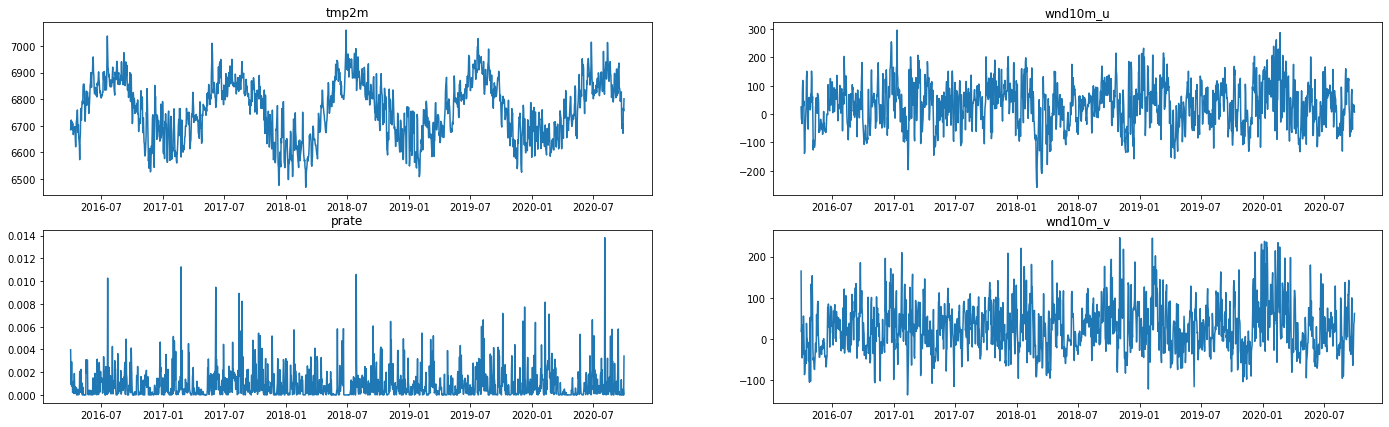

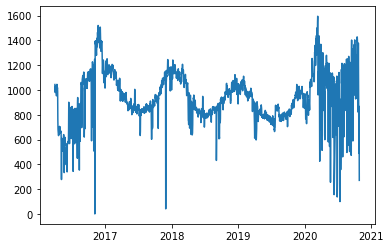

In [19]:
#read data
n0 = 10
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)
visu(meteo_df,consumption_df)

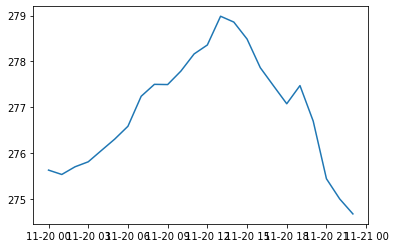

In [54]:
from datetime import date

one_day = date(2019,11,20)

def scale_to_day(df,one_day):
    df_one_day = df[df["date"]==one_day]
    df_one_day = df_one_day.sort_values("datetime").reset_index()
    df_one_day["hour"]=[d.hour for d in df_one_day.datetime]
    # df_one_day["hour"]=[df_one_day.datetime]
    return df_one_day
meteo_day = scale_to_day(meteo_df,one_day)

plt.plot(meteo_day.datetime,meteo_day.tmp2m)

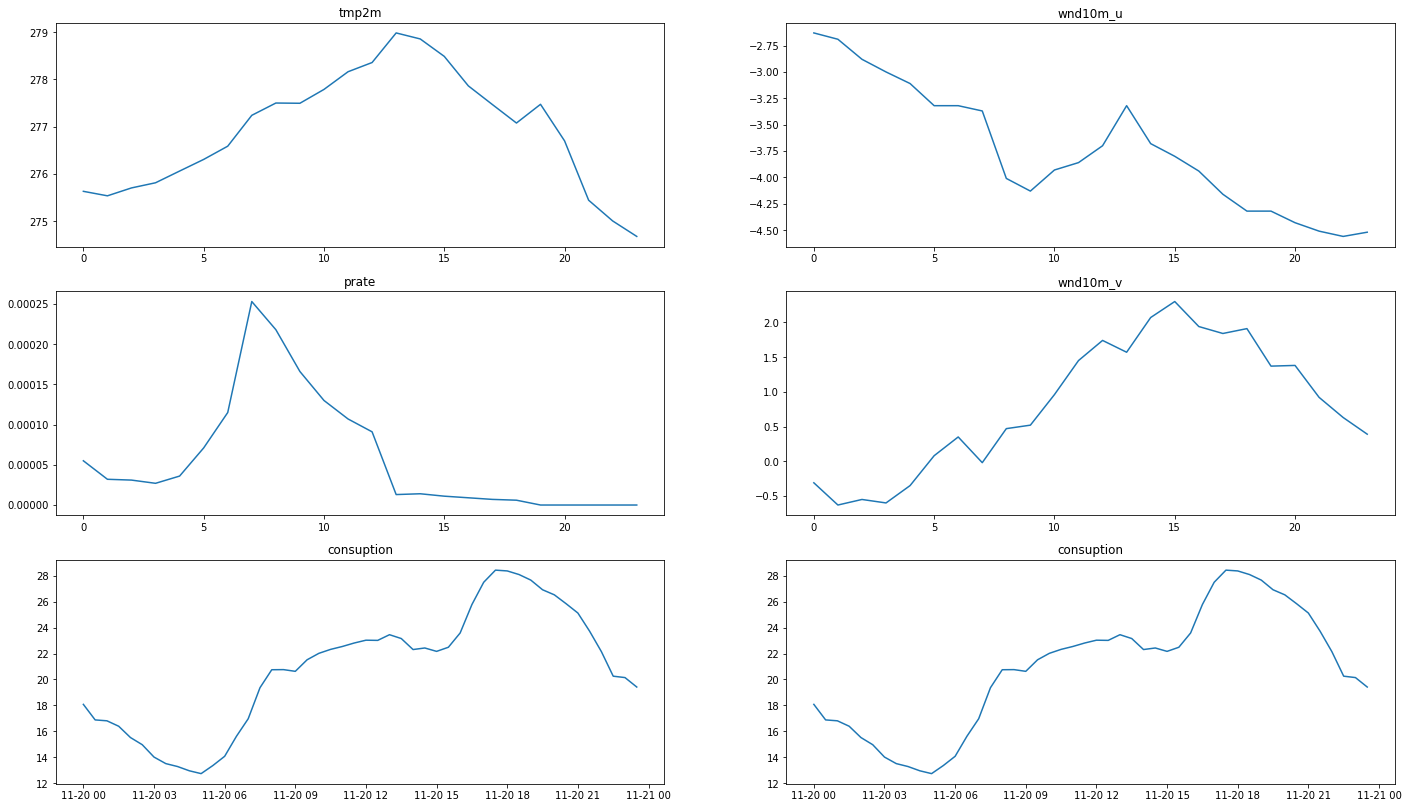

In [57]:
def visu(meteo_df,consumption_df):
    df_meteo_one_day = scale_to_day(meteo_df,one_day)
    df_consumption_one_day = scale_to_day(consumption_df,one_day)
    fig, axs = plt.subplots(3, 2,figsize=(24,14))
    axs[0, 0].plot(df_meteo_one_day.hour,df_meteo_one_day.tmp2m)
    axs[0, 0].set_title('tmp2m')
    axs[0, 1].plot(df_meteo_one_day.hour,df_meteo_one_day.wnd10m_u)
    axs[0, 1].set_title('wnd10m_u')
    axs[1, 1].plot(df_meteo_one_day.hour,df_meteo_one_day.wnd10m_v)
    axs[1, 1].set_title('wnd10m_v')
    axs[1, 0].plot(df_meteo_one_day.hour,df_meteo_one_day.prate)
    axs[1, 0].set_title('prate')
    axs[2, 0].plot(df_consumption_one_day.datetime,df_consumption_one_day.underlying_mw)
    axs[2, 0].set_title('consuption')
    axs[2, 1].plot(df_consumption_one_day.datetime,df_consumption_one_day.underlying_mw)
    axs[2, 1].set_title('consuption')
    # fig = plt.figure(figsize=(11,7))
    
visu(meteo_df,consumption_df)

In [55]:
meteo_day

,index,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date,hour
0,32652,0.000055,99.0,2019-11-20 00:00:00,275.634016,-2.63,-0.31,82039,2019-11-20 00:00:00,2019-11-20,0
1,19448,0.000032,97.0,2019-11-20 01:00:00,275.539016,-2.69,-0.63,82039,2019-11-20 01:00:00,2019-11-20,1
2,19590,0.000031,98.0,2019-11-20 02:00:00,275.706016,-2.88,-0.55,82039,2019-11-20 02:00:00,2019-11-20,2
3,19544,0.000027,98.0,2019-11-20 03:00:00,275.815016,-3.00,-0.60,82039,2019-11-20 03:00:00,2019-11-20,3
4,19552,0.000036,98.0,2019-11-20 04:00:00,276.063016,-3.11,-0.35,82039,2019-11-20 04:00:00,2019-11-20,4
5,19460,0.000071,99.0,2019-11-20 05:00:00,276.309000,-3.32,0.08,82039,2019-11-20 05:00:00,2019-11-20,5
6,19576,0.000115,99.0,2019-11-20 06:00:00,276.589016,-3.32,0.35,82039,2019-11-20 06:00:00,2019-11-20,6
7,19472,0.000253,100.0,2019-11-20 07:00:00,277.242016,-3.37,-0.02,82039,2019-11-20 07:00:00,2019-11-20,7
8,19572,0.000218,100.0,2019-11-20 08:00:00,277.502016,-4.01,0.47,82039,2019-11-20 08:00:00,2019-11-20,8
9,19618,0.000166,100.0,2019-11-20 09:00:00,277.497016,-4.13,0.52,82039,2019-11-20 09:00:00,2019-11-20,9


In [ ]:
##########################################
#Test below#
##########################################

In [20]:
# scaled_df = change_scale(meteo_df,48*30,"wnd10m_u")
scaled_df = change_scale(meteo_df,24,"prate")

scaled_df[:].plot(title = "prate/jour")

# meteo_df.tmp2m[:365].plot()

TypeError: change_scale() takes 1 positional argument but 3 were given

In [ ]:
scaled_df = change_scale(meteo_df,24,"tmp2m")
scaled_df[:].plot(title = "tmp2m/jour")

In [ ]:
scaled_df = change_scale(consumption_df,48,"underlying_mw")
scaled_df[:].plot(title = "consommation/jour")


In [ ]:
meteo_df.columns

In [ ]:
plt.plot(scaled_df)